<a href="https://colab.research.google.com/github/AtabikM1/PCVK25_3F_05/blob/main/Week10_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

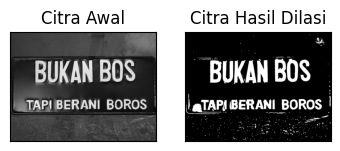

In [15]:
#Dilasi tanpa library
def dilasi_citra(F,w):
  #size image
  p,q= F.shape
  imgD= np.zeros((p,q), dtype=np.uint8)
  #Generate structure element dilasi (SED)
  SED= np.ones((w,w), dtype=np.uint8)
  constant1= (w-1)//2
  #Proses Dilasi
  for i in range(constant1, p-constant1):
    for j in range(constant1,q-constant1):
      temp= F[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
      product= temp*SED
      imgD[i,j]= np.max(product)
  return imgD

img_d= cv2.imread('/content/gdrive/MyDrive/PCVK_MM/Images/plat_nomor.jpg',0)
ret, thresh = cv2.threshold(img_d, 125, 200, cv2.THRESH_BINARY)
w=5

imgD = dilasi_citra(thresh,w)
plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgD,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]), plt.yticks([])
plt.show()

[[1 1 1]
 [1 1 1]
 [1 1 1]]


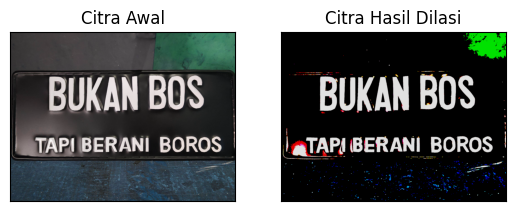

In [17]:
img = cv2.imread('/content/gdrive/MyDrive/PCVK_MM/Images/plat_nomor.jpg')
#img = cv2.imread('morp.jpg',0)
ret, thresh = cv2.threshold(img, 127, 225, cv2.THRESH_BINARY)
kernel = np.ones((3,3),np.uint16)
dilasi = cv2.dilate(thresh,kernel,iterations = 1)
print(kernel)
plt.subplot(121),plt.imshow(img),plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dilasi),plt.title('Citra Hasil Dilasi')
plt.xticks([]), plt.yticks([])
plt.show()

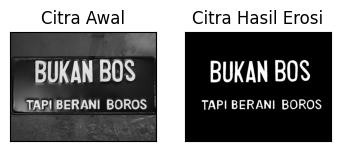

In [18]:
#Erosi Tanpa Library
def erosi_citra(F,k):
  #size image
  m,n= F.shape
  #Generate structure element erosi (SE)
  SE= np.ones((k,k), dtype=np.uint8)
  constant= (k-1)//2
  imgE= np.zeros((m,n), dtype=np.uint8)
  #Proses Erosi
  for i in range(constant, m-constant):
    for j in range(constant,n-constant):
      temp= F[i-constant:i+constant+1, j-constant:j+constant+1]
      product= temp*SE
      imgE[i,j]= np.min(product)
  return imgE

img_e= cv2.imread('/content/gdrive/MyDrive/PCVK_MM/Images/plat_nomor.jpg',0) #
ret1, thresh1 = cv2.threshold(img_e, 175, 225, cv2.THRESH_BINARY)
k=5
imgE = erosi_citra(thresh1,k)
plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])
plt.show()

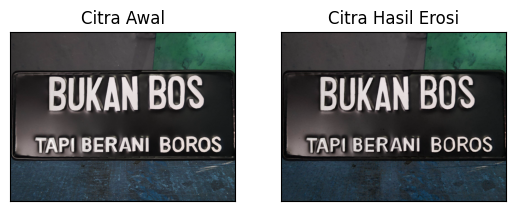

In [19]:
#EROSI LIBRARY
img = cv2.imread('/content/gdrive/MyDrive/PCVK_MM/Images/plat_nomor.jpg')
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)
plt.subplot(121),plt.imshow(img),plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(erosion),plt.title('Citra Hasil Erosi')
plt.xticks([]), plt.yticks([])
plt.show()

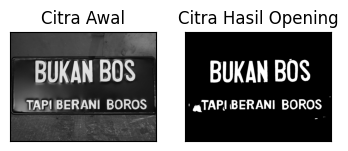

In [20]:
# Operasi Opening Menggunakan tanpa Library Morphology
# NOTE: Ini membutuhkan fungsi dilasi_citra dan erosi_citra dari sel sebelumnya
img_o= cv2.imread('/content/gdrive/MyDrive/PCVK_MM/Images/plat_nomor.jpg',0) #
reto, thresho = cv2.threshold(img_o, 127, 225, cv2.THRESH_BINARY)
k=7
imgO = dilasi_citra(erosi_citra(thresho,k),k)
plt.subplot(131),plt.imshow(img_o,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgO,cmap = 'gray')
plt.title('Citra Hasil Opening'), plt.xticks([]), plt.yticks([])
plt.show()

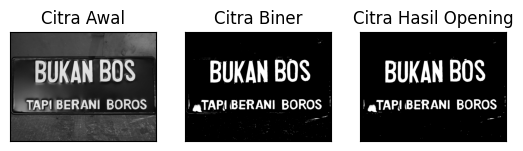

In [21]:
# Operasi Opening Menggunakan Library Morphology
#Dengan Menggunakan Library
img = cv2.imread('/content/gdrive/MyDrive/PCVK_MM/Images/plat_nomor.jpg',0)
ret, thresh = cv2.threshold(img, 127, 225, cv2.THRESH_BINARY)
kernel = np.ones((3,3),np.uint8)
openn = cv2.morphologyEx(thresh,cv2.MORPH_OPEN, kernel)
plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(thresh,cmap = 'gray')
plt.title('Citra Biner'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(openn,cmap = 'gray')
plt.title('Citra Hasil Opening'), plt.xticks([]), plt.yticks([])
plt.show()

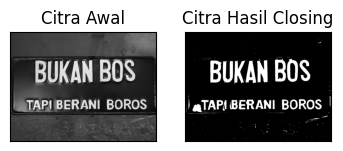

In [22]:
# operasi closing tanpa library morphology
# NOTE: Ini membutuhkan fungsi dilasi_citra dan erosi_citra dari sel sebelumnya
img_c= cv2.imread('/content/gdrive/MyDrive/PCVK_MM/Images/plat_nomor.jpg',0) #
retc, threshc = cv2.threshold(img_c, 127, 225, cv2.THRESH_BINARY)
k=7
imgC = erosi_citra(dilasi_citra(threshc,k),k)
plt.subplot(131),plt.imshow(img_c,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgC,cmap = 'gray')
plt.title('Citra Hasil Closing'), plt.xticks([]), plt.yticks([])
plt.show()

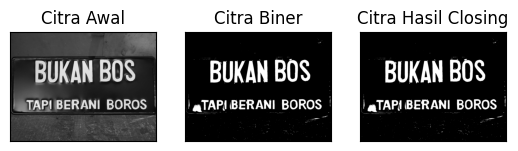

In [23]:
# operasi closing dengan library morphology
img = cv2.imread('/content/gdrive/MyDrive/PCVK_MM/Images/plat_nomor.jpg',0)
ret, thresh = cv2.threshold(img, 127, 225, cv2.THRESH_BINARY)
kernel = np.ones((3,3),np.uint8)
closs = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE, kernel)
plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(thresh,cmap = 'gray')
plt.title('Citra Biner'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(closs,cmap = 'gray')
plt.title('Citra Hasil Closing'), plt.xticks([]), plt.yticks([])
plt.show()

SED = Cross 3


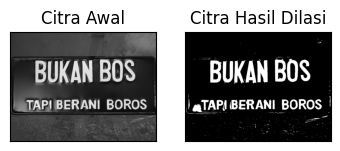

In [24]:
#Dilasi Cross SED
def dilasi_citra(F,w):
  #size image
  p,q= F.shape
  imgD= np.zeros((p,q), dtype=np.uint8)
  #Generate structure element dilasi (SED)
  # SED= np.ones((w,w), dtype=np.uint8)
  SED = np.array([[0, 1, 0],
                  [1, 1, 1],
                  [0, 1, 0]], dtype = np.uint8)

  constant1= (w-1)//2
  #Proses Dilasi
  for i in range(constant1, p-constant1):
    for j in range(constant1,q-constant1):
      temp= F[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
      product= temp*SED
      imgD[i,j]= np.max(product)
  return imgD

print('SED = Cross 3')
img_d= cv2.imread('/content/gdrive/MyDrive/PCVK_MM/Images/plat_nomor.jpg',0)
ret, thresh = cv2.threshold(img_d, 127, 225, cv2.THRESH_BINARY)
w=3
imgD = dilasi_citra(thresh,w)
plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgD,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]), plt.yticks([])
plt.show()

SED = Cross 5


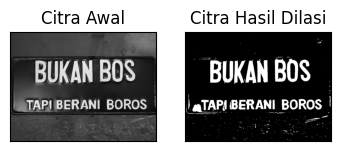

In [25]:
def dilasi_citra(F,w):
  #size image
  p,q= F.shape
  imgD= np.zeros((p,q), dtype=np.uint8)
  #Generate structure element dilasi (SED)
  # SED= np.ones((w,w), dtype=np.uint8)
  SED = np.array([[0, 0, 1, 0, 0],
                  [0, 0, 1, 0, 0],
                  [1, 1, 1, 1, 1],
                  [0, 0, 1, 0, 0],
                  [0, 0, 1, 0, 0]], dtype = np.uint8)

  constant1= (w-1)//2
  #Proses Dilasi
  for i in range(constant1, p-constant1):
    for j in range(constant1,q-constant1):
      temp= F[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
      product= temp*SED
      imgD[i,j]= np.max(product)
  return imgD

print('SED = Cross 5')
img_d= cv2.imread('/content/gdrive/MyDrive/PCVK_MM/Images/plat_nomor.jpg',0)
ret, thresh = cv2.threshold(img_d, 127, 225, cv2.THRESH_BINARY)
w=5
imgD = dilasi_citra(thresh,w)
plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgD,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]), plt.yticks([])
plt.show()

SED = Circle 3


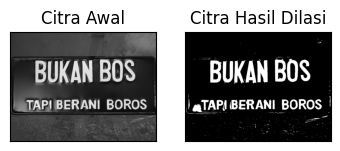

In [26]:
#Dilasi Circular SED
def dilasi_citra(F,w):
  #size image
  p,q= F.shape
  imgD= np.zeros((p,q), dtype=np.uint8)
  #Generate structure element dilasi (SED)
  SED= cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(w,w))
  constant1= (w-1)//2
  #Proses Dilasi
  for i in range(constant1, p-constant1):
    for j in range(constant1,q-constant1):
      temp= F[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
      product= temp*SED
      imgD[i,j]= np.max(product)
  return imgD

print('SED = Circle 3')
img_d= cv2.imread('/content/gdrive/MyDrive/PCVK_MM/Images/plat_nomor.jpg',0)
ret, thresh = cv2.threshold(img_d, 127, 225, cv2.THRESH_BINARY)
w=3
imgD = dilasi_citra(thresh,w)
plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgD,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]), plt.yticks([])
plt.show()

SED = Circle 5


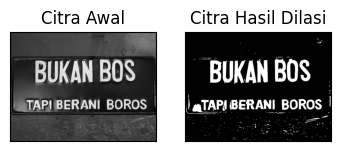

In [27]:
print('SED = Circle 5')
img_d= cv2.imread('/content/gdrive/MyDrive/PCVK_MM/Images/plat_nomor.jpg',0)
ret, thresh = cv2.threshold(img_d, 127, 225, cv2.THRESH_BINARY)
w=5
imgD = dilasi_citra(thresh,w) # Menggunakan fungsi dari sel sebelumnya
plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgD,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]), plt.yticks([])
plt.show()

SE = Rectangle 3x5


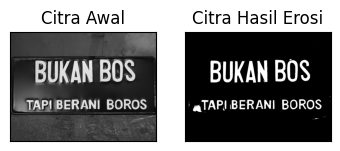

In [28]:
#Erosi Cross SE
def erosi_citra(F,p,l):
  #size image
  m,n= F.shape
  #Generate structure element erosi (SE)
  SE = cv2.getStructuringElement(cv2.MORPH_RECT,(p,l)) #SE persegi panjang
  constant1= (l-1)//2
  constant2= (p-1)//2
  # print(SE)
  imgE= np.zeros((m,n), dtype=np.uint8)
  #Proses Erosi
  for i in range(constant1, m-constant1):
    for j in range(constant2,n-constant2):
      temp= F[i-constant1:i+constant1+1, j-constant2:j+constant2+1]
      product= temp*SE
      imgE[i,j]= np.min(product)
  return imgE

print('SE = Rectangle 3x5') # Judul 3x5, tapi kernel (p,l) = (5,3)
img_e= cv2.imread('/content/gdrive/MyDrive/PCVK_MM/Images/plat_nomor.jpg',0) #
ret1, thresh1 = cv2.threshold(img_e, 127, 225, cv2.THRESH_BINARY)
p=5
l=3
imgE = erosi_citra(thresh1,p,l)
plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])
plt.show()

SE = Rectangle 5x7


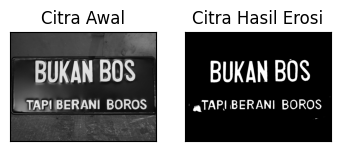

In [29]:
print('SE = Rectangle 5x7') # Judul 5x7, tapi kernel (p,l) = (7,5)
img_e= cv2.imread('/content/gdrive/MyDrive/PCVK_MM/Images/plat_nomor.jpg',0) #
ret1, thresh1 = cv2.threshold(img_e, 127, 225, cv2.THRESH_BINARY)
p=7
l=5
imgE = erosi_citra(thresh1,p,l) # Menggunakan fungsi dari sel sebelumnya
plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])
plt.show()

SE = Line Vertikal 3


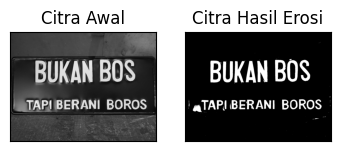

In [30]:
#Erosi Line Vertikal SE
def erosi_citra(F,k):
  #size image
  m,n= F.shape
  #Generate structure element erosi (SE)
  SE = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(1,k)) #SE line vertikal (k,1)
  constant= (k-1)//2
  imgE= np.zeros((m,n), dtype=np.uint8)
  #Proses Erosi
  for i in range(constant, m-constant):
    for j in range(constant,n-constant):
      temp= F[i-constant:i+constant+1, j-constant:j+constant+1] # Slicing (k,k)
      product= temp*SE # Broadcasting (k,k) * (k,1)
      imgE[i,j]= np.min(product)
  return imgE

print('SE = Line Vertikal 3')
img_e= cv2.imread('/content/gdrive/MyDrive/PCVK_MM/Images/plat_nomor.jpg',0) #
ret1, thresh1 = cv2.threshold(img_e, 127, 225, cv2.THRESH_BINARY)
k=3
imgE = erosi_citra(thresh1,k)
plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])
plt.show()

SE = Line Vertikal 5


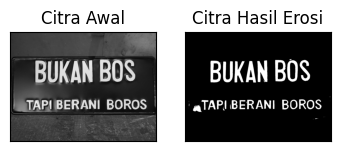

In [31]:
print('SE = Line Vertikal 5')
img_e= cv2.imread('/content/gdrive/MyDrive/PCVK_MM/Images/plat_nomor.jpg',0) #
ret1, thresh1 = cv2.threshold(img_e, 127, 225, cv2.THRESH_BINARY)
k=5
imgE = erosi_citra(thresh1,k) # Menggunakan fungsi dari sel sebelumnya
plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])
plt.show()

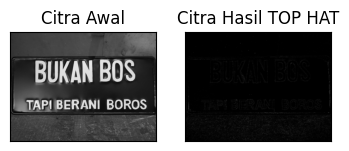

In [32]:
# 13 TopHat
# Getting the kernel to be used in Top-Hat
filterSize =(3, 3)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, filterSize)

# Reading the image named 'input.jpg'
img = cv2.imread('/content/gdrive/MyDrive/PCVK_MM/Images/plat_nomor.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Applying the Top-Hat operation
# !!! Perbaikan: Variabel di source code 'input_image' diubah menjadi 'img' agar bisa jalan
tophat_img = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)

#cv2.imshow("original", input_image)
#cv2.imshow("tophat", tophat_img)
#cv2.waitKey(5000)
plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(tophat_img,cmap = 'gray')
plt.title('Citra Hasil TOP HAT'), plt.xticks([]), plt.yticks([])
plt.show()

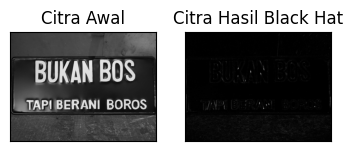

In [33]:
# 14 BLACKHAT
filterSize =(3, 3)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, filterSize)
# Reading the image named 'input.jpg'
img = cv2.imread('/content/gdrive/MyDrive/PCVK_MM/Images/kitten01.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Applying the Black-Hat operation
#tophat_img = cv2.morphologyEx(img,cv2.MORPH_BLACKHAT, kernel)
Kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (13, 5))
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, Kernel)

#cv2.imshow("original", input_image)
#cv2.imshow("tophat", tophat_img)
#cv2.waitKey(5000)
plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(blackhat,cmap = 'gray')
plt.title('Citra Hasil Black Hat'), plt.xticks([]), plt.yticks([])
plt.show()

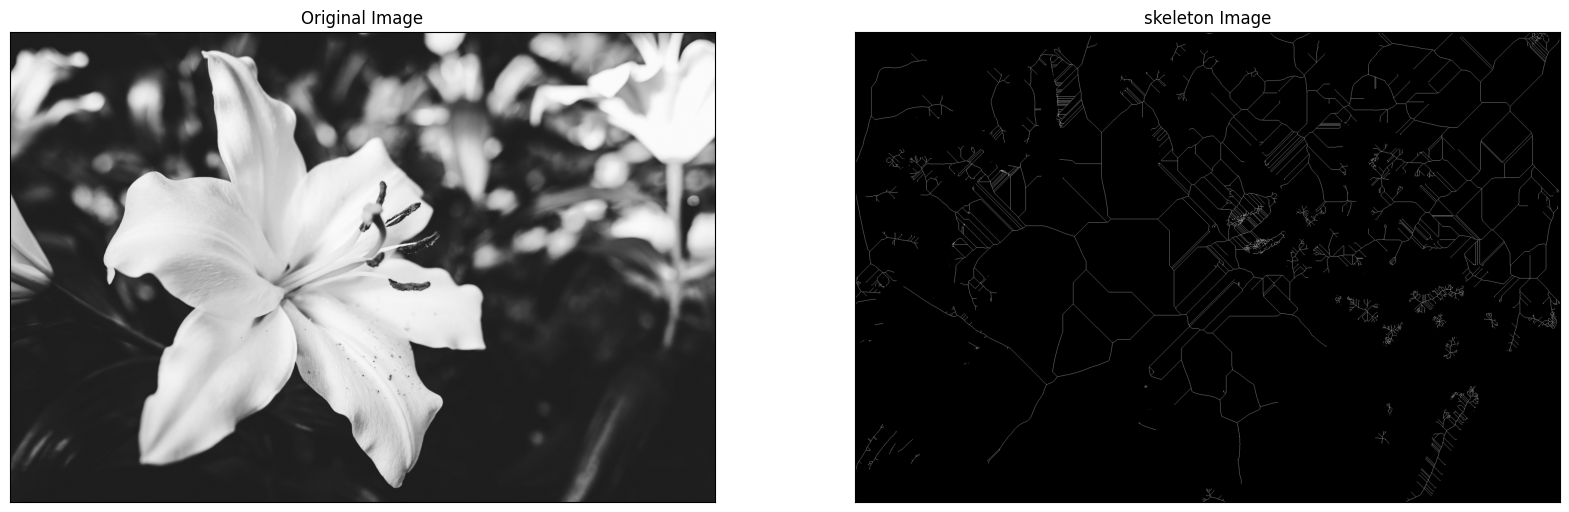

In [40]:
# 15. Skeleton
import cv2 as cv
from matplotlib import pyplot as plt
from skimage import filters
from skimage.morphology import skeletonize

# read image
img = cv.imread('/content/gdrive/MyDrive/PCVK_MM/Images/lily.jpg',0)
binary = img > filters.threshold_triangle(img)

# true false to one
binary_cp = binary.copy()
binary_cp[binary_cp == True] = 1
binary_cp[binary_cp == False] = 0

# skeletonize image
skeleton = skeletonize(binary_cp)

# print images
plt.figure(figsize=(20,20))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(skeleton,cmap = 'gray')
plt.title('skeleton Image'), plt.xticks([]), plt.yticks([])

plt.savefig("binary and bin_skeleton.png")
plt.show()

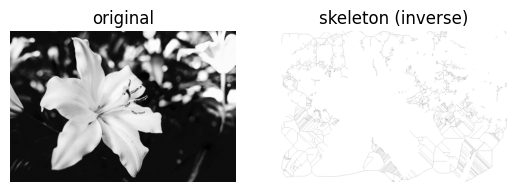

In [39]:
# 16. Skeleton Inverse
from skimage import io
from matplotlib import pyplot as plt
from skimage import filters
from skimage.morphology import skeletonize

# read image
img = io.imread('/content/gdrive/MyDrive/PCVK_MM/Images/lily.jpg')[..., 0]
# Note: we want the black bits to be True, so use <
binary = img < filters.threshold_triangle(img)

# skeletonize image
skeleton = skeletonize(binary)

# print images
fig, ax = plt.subplots(1, 2)
ax[0].imshow(img, cmap='gray')
ax[0].set_title('original')
ax[0].set_axis_off()

# note the reversed colormap, gray_r
ax[1].imshow(skeleton, cmap='gray_r')
ax[1].set_title('skeleton (inverse)')
ax[1].set_axis_off()

plt.show()

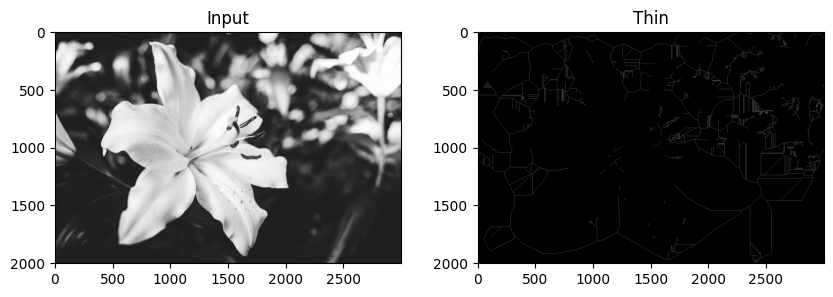

In [41]:
# 17. Thickening (Source code melakukan 'Thinning')
from skimage import img_as_float
from skimage import io, color, morphology
import matplotlib.pyplot as plt

image = img_as_float(color.rgb2gray(io.imread('/content/gdrive/MyDrive/PCVK_MM/Images/lily.jpg')))
image_binary = image < 0.5
out_skeletonize = morphology.skeletonize(image_binary)
out_thin = morphology.thin(image_binary)

f, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 3))
ax0.imshow(image, cmap='gray')
ax0.set_title('Input')

ax1.imshow(out_thin, cmap='gray')
ax1.set_title('Thin')
# plt.savefig('/tmp/char_out.png') # Opsi untuk menyimpan gambar
plt.show()